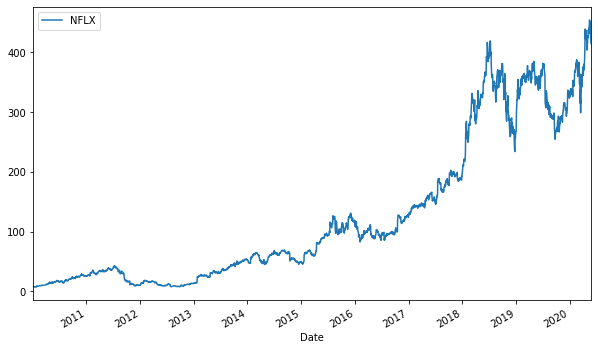

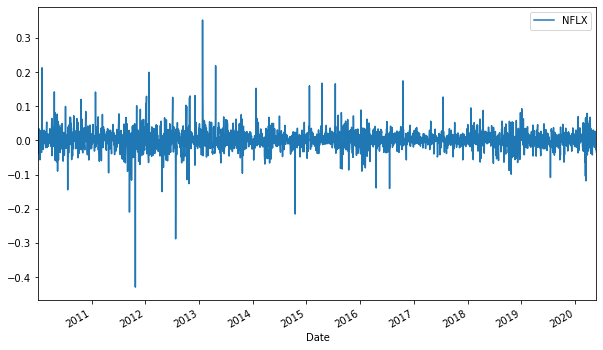

In [38]:
#Below is some example code for a Monte Carlo simulation to approximate daily future prices for a stock.


import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

#forecast Netflix's future stock price
ticker= "NFLX"
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2010-1-1')['Adj Close']

log_returns=np.log(1+data.pct_change()) #obtain simple logarithmic returns
log_returns.tail()


#plot of stock price
data.plot(figsize=(10,6));

#plot of log returns. Graph indicates a normal distribution of returns with stable mean.
log_returns.plot(figsize=(10,6));



In [16]:
#calculate mean and variance of returns.
u=log_returns.mean()
u


NFLX    0.001527
dtype: float64

In [17]:
#This tells us how far stock prices are spread out from the mean.
var=log_returns.var()
var


NFLX    0.001066
dtype: float64

In [19]:
#drift is essentially the change in the average value of the stock prices over time.
drift=u-(0.5*var)
drift


NFLX    0.000994
dtype: float64

In [20]:
#This is a measure of the spread of stock prices over time.
stdev=log_returns.std()
stdev


NFLX    0.032657
dtype: float64

In [21]:
#check types for drift and stdev
type(drift)



pandas.core.series.Series

In [22]:
type(stdev)

pandas.core.series.Series

In [23]:
#convert the values for drift and stdev into numpy arrays. Obtain same result by adding '.values'
np.array(drift)

array([0.00099423])

In [24]:
stdev.values

array([0.0326569])

In [25]:
#create a variable that generates random potential future daily returns each day.
norm.ppf(0.95)
#event has 95% chance of occuring, distance = 1.65 standard deviations

1.6448536269514722

In [26]:
#create a random variable 'x'
x=np.random.rand(10,2) #2 is the number of arguments chosen here to generate a multi-dimensional array (10x2 matrix)
x


array([[0.35161882, 0.91949004],
       [0.84016601, 0.13142453],
       [0.0498119 , 0.39386064],
       [0.14840983, 0.97941693],
       [0.60008059, 0.52311128],
       [0.07690969, 0.87700625],
       [0.08616876, 0.96934092],
       [0.53399852, 0.26182853],
       [0.85237859, 0.17367071],
       [0.37513511, 0.63816797]])

In [27]:
#include 'x' in ppf matrix to obtain distance from mean corresponding to each of these randomly generated probabilities.
norm.ppf(x)


array([[-0.38095366,  1.40164954],
       [ 0.99514042, -1.11968257],
       [-1.64668019, -0.26927083],
       [-1.04327777,  2.04185269],
       [ 0.2535557 ,  0.05796382],
       [-1.42616962,  1.16015057],
       [-1.36473127,  1.87119422],
       [ 0.08532508, -0.63771832],
       [ 1.04668948, -0.93975857],
       [-0.31828308,  0.35356613]])

In [28]:
z=norm.ppf(np.random.rand(10,2))
z
#used the randomly generated probabilities from x to calculate distances from mean zero.

array([[-0.60637283, -1.1183643 ],
       [-0.31830569,  1.04717309],
       [ 0.59740219,  0.55666528],
       [-1.11272622,  0.61345296],
       [ 1.37710464,  0.08621409],
       [ 0.76132437, -1.1222043 ],
       [-1.31407217,  0.61215946],
       [-0.32316076,  0.12208681],
       [ 0.56760464,  1.79971252],
       [-1.19284955, -0.14937533]])

In [41]:
#Below is number of days we want the simulation to run for (t-intervals) and the number of times we want it to run (iterations)
#The larger the iteration the closer we will get to the expected return.
t_intervals=365
iterations=10 

#dailyreturns=e^r
#r=drift + stdev*z
#Using the 2 equations above, we generate a dailyreturns array.
dailyreturns=np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
dailyreturns

#This generates a 100x10 array of random future stock prices.

array([[0.99370738, 0.9867362 , 0.97143274, ..., 0.97953779, 1.01485182,
        0.98618061],
       [0.96915131, 1.05115103, 0.95908617, ..., 1.02102903, 1.00852036,
        0.96516092],
       [0.99405812, 0.98987673, 1.00588388, ..., 1.01570871, 1.05735871,
        1.01579368],
       ...,
       [1.05333797, 0.99447083, 0.96412243, ..., 1.05695826, 0.97779936,
        0.99050363],
       [0.95546899, 0.98306429, 1.03426647, ..., 1.01384374, 1.00129692,
        0.96436701],
       [0.98618214, 0.96874498, 0.99241444, ..., 0.93811343, 1.00689448,
        0.98087922]])

In [42]:
#create price list: price(t) = price(0)*simulated daily return(t)
#Then, price(t+1)=price(t)*simulated daily return (t+1)


#We want the first stock price equal to last price in our dataset. This reflects the current market price. 
#Let this be S0.
S0=data.iloc[-1] 
S0



NFLX    414.769989
Name: 2020-05-26 00:00:00, dtype: float64

In [43]:
#Create a numpy array with same dimensions as dailyreturns array, and fill with zeros.
price_list=np.zeros_like(dailyreturns) 
price_list


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
#Replace zeros with expected stock prices using a loop.
#We do this by setting first row of prices equal to current market price.
price_list[0]=S0 
price_list 


array([[414.76998901, 414.76998901, 414.76998901, ..., 414.76998901,
        414.76998901, 414.76998901],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [45]:
#Set up a loop starting at day 1 & ending at day 365.
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*dailyreturns[t]
    
price_list


array([[ 414.76998901,  414.76998901,  414.76998901, ...,  414.76998901,
         414.76998901,  414.76998901],
       [ 401.97487629,  435.98590058,  397.80015967, ...,  423.49219886,
         418.30397923,  400.31978296],
       [ 399.58638972,  431.57229569,  400.14076948, ...,  430.14471296,
         442.29735753,  406.64230468],
       ...,
       [1282.22466203, 1918.15850979,  393.07171048, ...,  493.12808796,
         301.16367597,  945.62471929],
       [1225.12590806, 1885.67312475,  406.54089057, ...,  499.95482546,
         301.55426067,  911.92928124],
       [1208.19728443, 1826.7363727 ,  403.45704943, ...,  469.0143379 ,
         303.63331903,  894.4924816 ]])

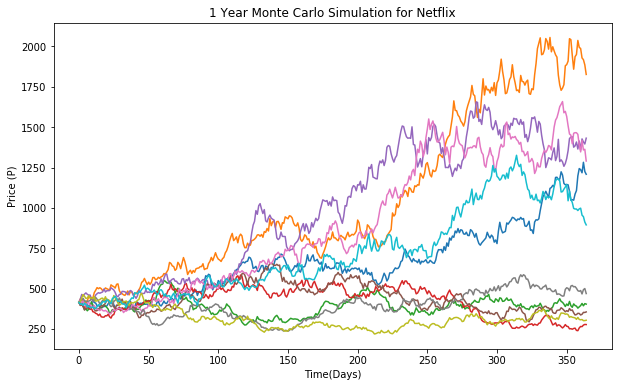

In [46]:

#The next few lines are using matplotlib.
plt.figure(figsize=(10,6))
plt.title("1 Year Monte Carlo Simulation for Netflix")
plt.ylabel("Price (P)")
plt.xlabel("Time(Days)")
plt.plot(price_list);
#This generates a graph of 10 possible stock price paths of expected stock price of Netflix.

